<h1>Репрезентативный журнал проекта 'Intelligent_placer'</h1>
<h4>Выполнил студент Сачук Александр Сергеевич группы 5030102/90201</h4>

<h5>Этап 0. Подготовка журнала</h5>

Осуществляются импорты и загрузка нужных библиотек

In [1]:
!python.exe -m pip install --upgrade pip
!pip install -r requirements.txt

In [2]:
import intelligent_placer_lib.intelligent_placer_lib as placer
import os

placer.IS_DEBUG_MODE = True

Ниже представлены пути до всех тестовых изображений, на которых будет продемонстрирована работа библиотеки.

In [3]:
OBJECTS_IMGS_PATHS = []
TESTS_IMGS_PATHS = []
OBJECTS_FOLDER_PATH = "./objects/"
TESTS_FOLDER_PATH = "./tests/"

for dir in os.listdir(OBJECTS_FOLDER_PATH):
    # objects have jpg format
    if dir.endswith(".jpg") and dir != "clear.jpg":
        OBJECTS_IMGS_PATHS.append(OBJECTS_FOLDER_PATH + dir)

for dir in os.listdir(TESTS_FOLDER_PATH):
    # tests have jpg format
    if dir.endswith(".jpg"):
        TESTS_IMGS_PATHS.append(TESTS_FOLDER_PATH + dir)

<h5>Этап 1. Выделение масок</h5>

Первый этап состоит из выделения масок объектов и многоугольника. Ниже для каждого тестового изображения представлены 2 соответствующих графика: ЧБ-график предобработанной бинаризации в диапазоне выставленных HSV-диапазонах (диапазоны выставляются с учетом требований к постановке задачи), а затем - выделенные границы объектов. 

Можно заметить, что не все выделенные области при бинаризации выделяются границами. Дело в том, что боковые артефакты, связанные с вспышкой, отсеиваются как "контуры, которые слишком близко к границам": такое решение допустимо в силу ограничения сверху расстояния от поверхности и размерами предметов, множество которых, к слову, тоже ограничено (если бы вместо артефакта мы бы случайно удалили объект, то вероятнее всего, объект был бы не полностью помещен).

На втором графике зелеными границами представлены объекты, которые предстоит помещать в многоугольник, синими границами - границы многоугольника.

Current image: './tests/0_0.jpg'


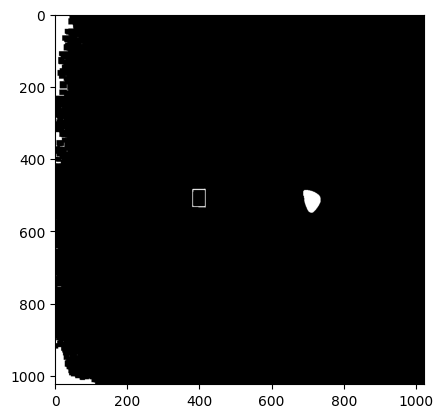

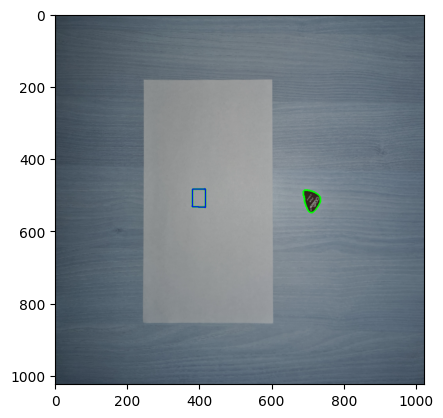

Current image: './tests/0_1.jpg'


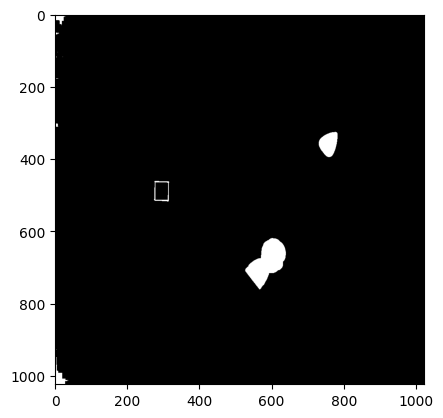

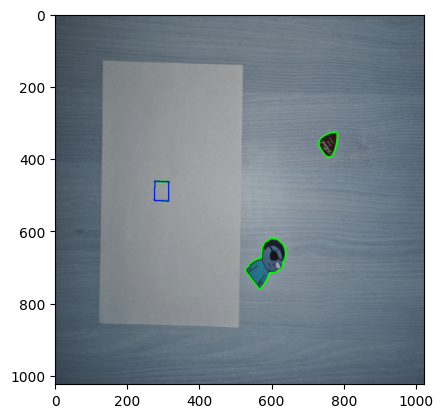

Current image: './tests/0_2.jpg'


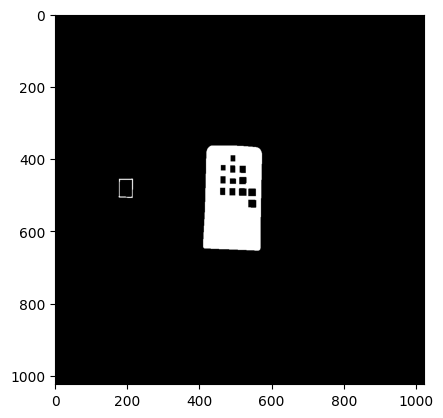

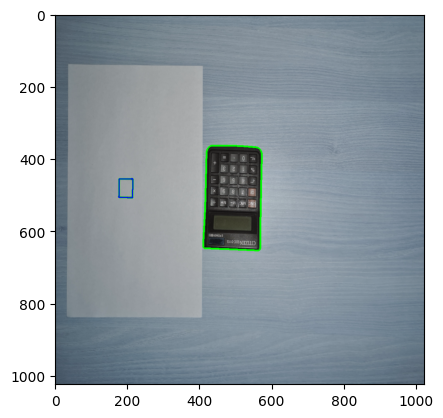

Current image: './tests/0_3.jpg'


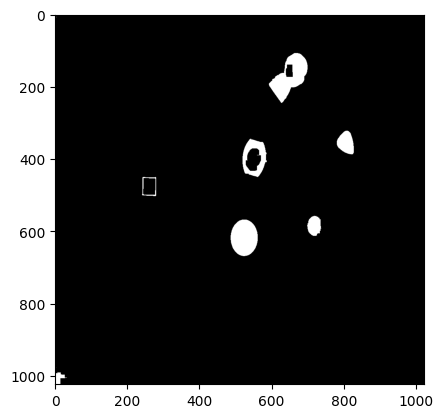

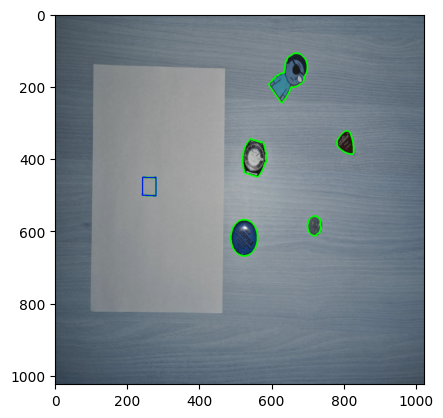

Current image: './tests/1_0.jpg'


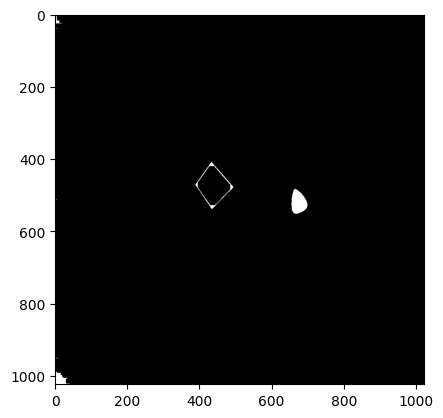

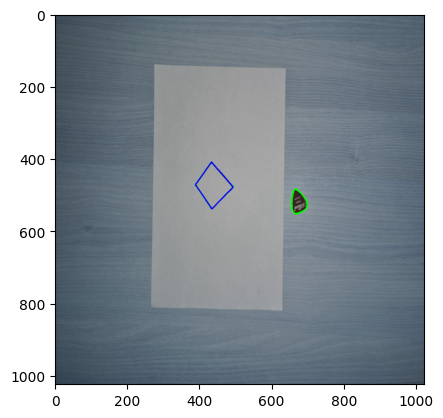

Current image: './tests/1_1.jpg'


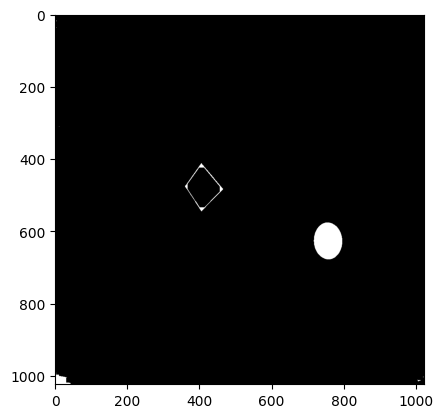

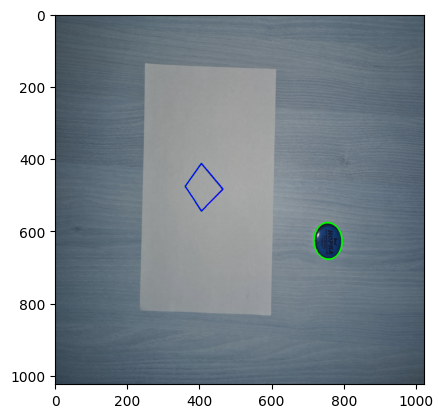

Current image: './tests/1_2.jpg'


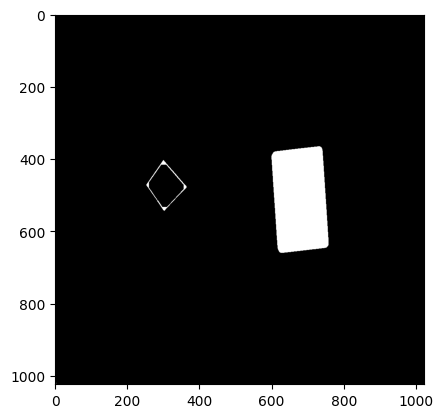

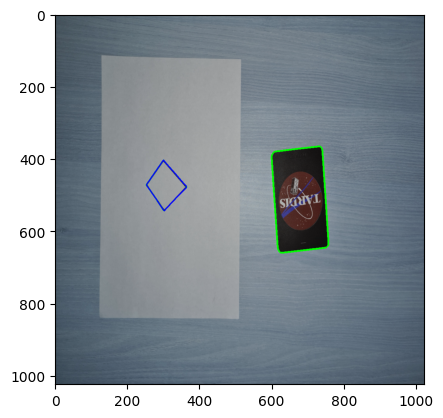

Current image: './tests/1_3.jpg'


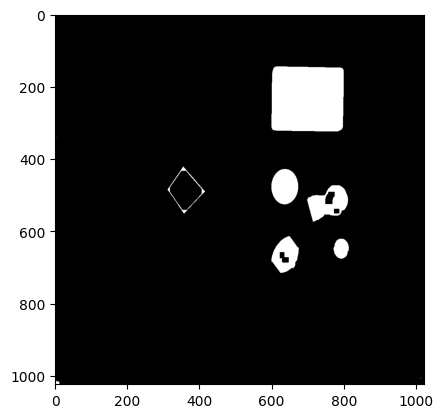

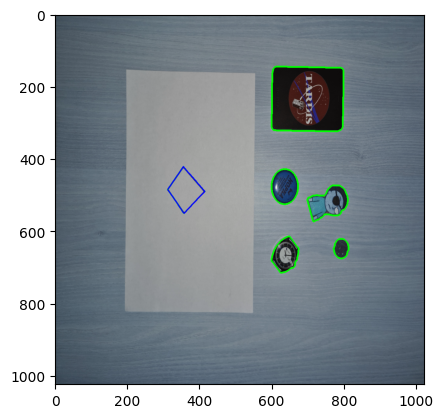

Current image: './tests/2_0.jpg'


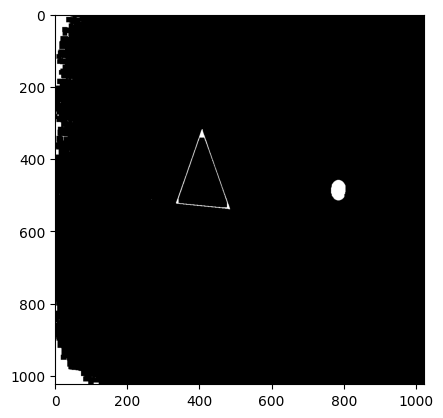

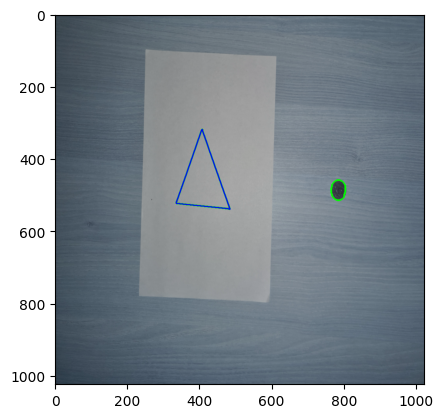

Current image: './tests/2_1.jpg'


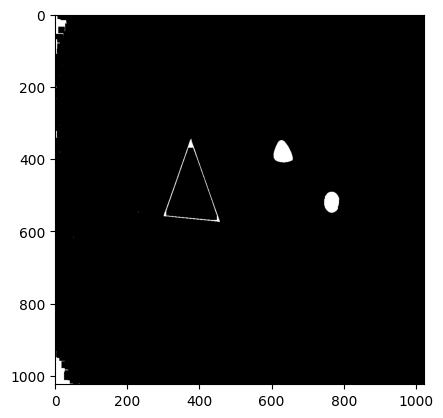

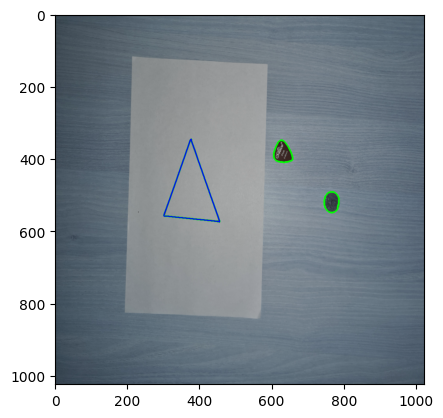

Current image: './tests/2_2.jpg'


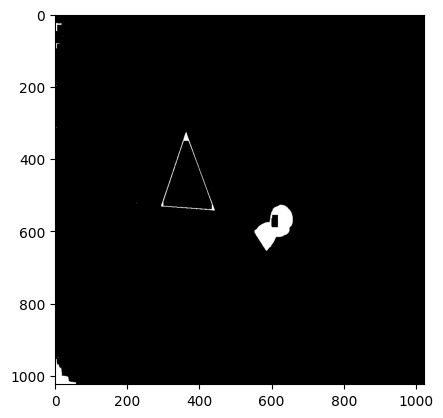

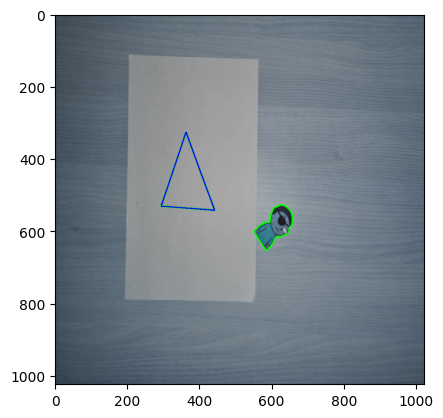

Current image: './tests/2_3.jpg'


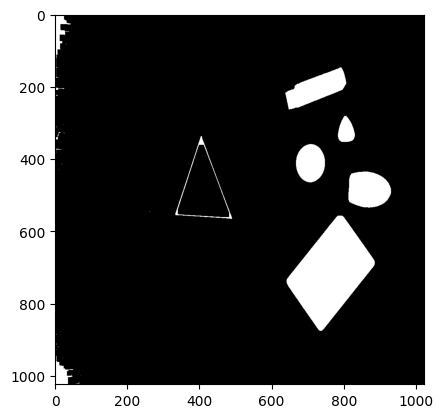

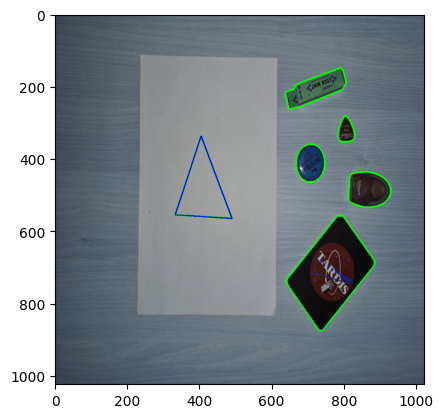

Current image: './tests/3_0.jpg'


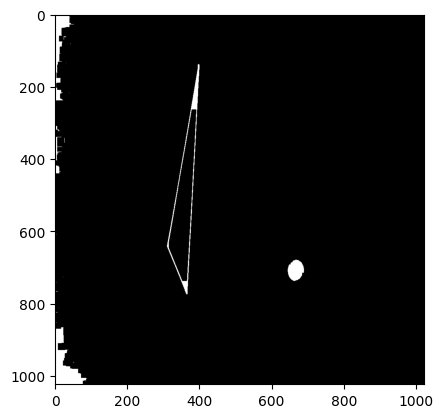

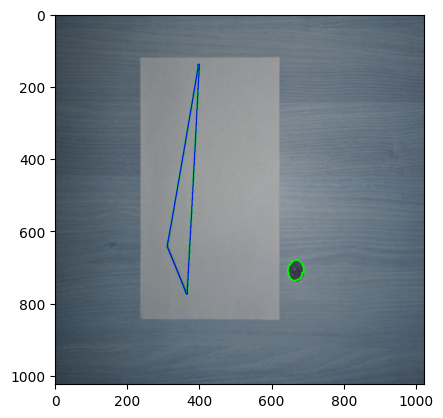

Current image: './tests/3_1.jpg'


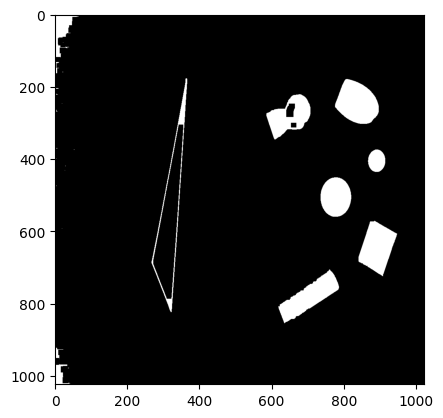

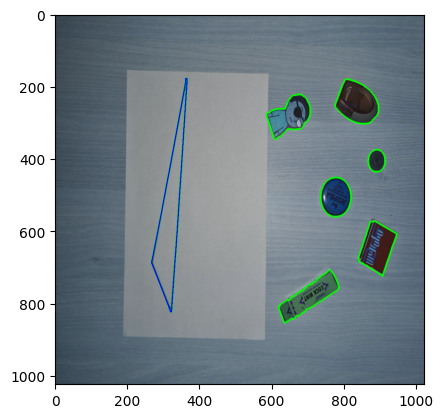

Current image: './tests/3_2.jpg'


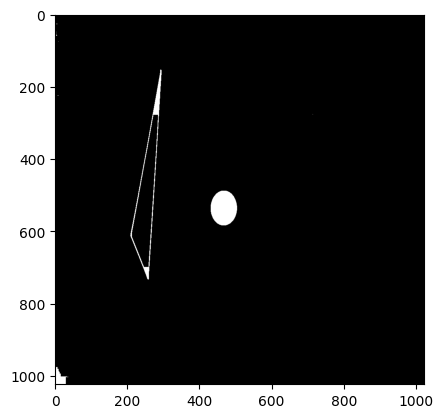

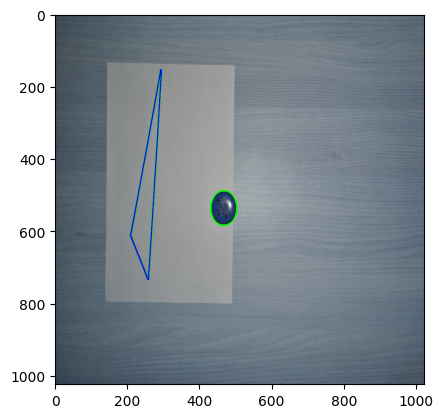

Current image: './tests/3_3.jpg'


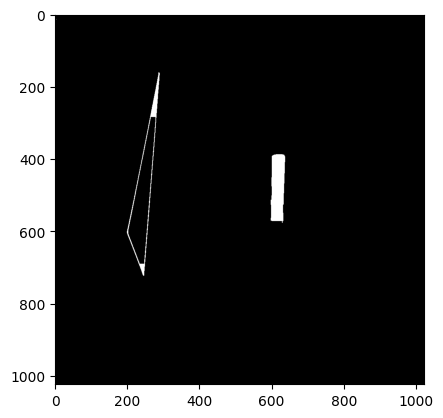

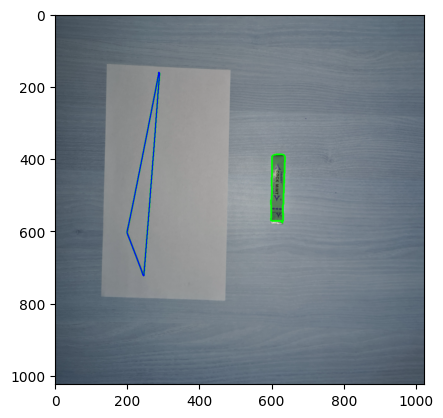

Current image: './tests/3_4.jpg'


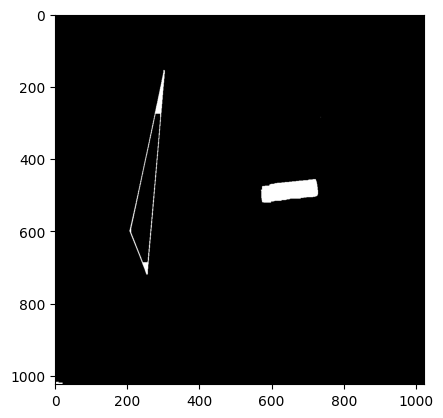

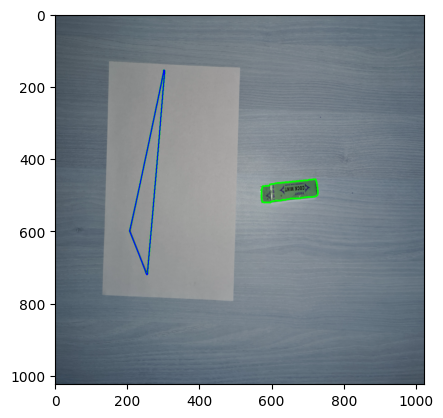

Current image: './tests/4_0.jpg'


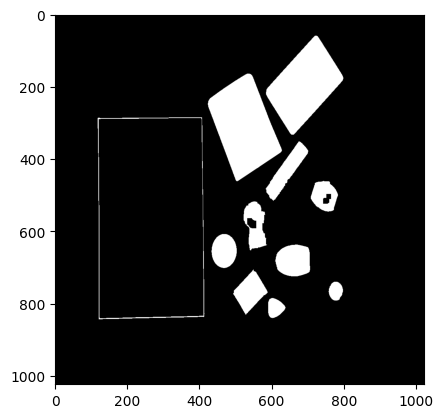

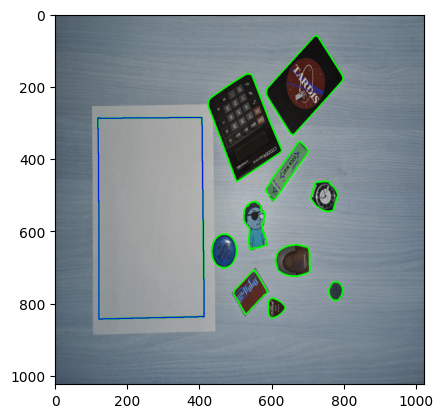

Current image: './tests/4_1.jpg'


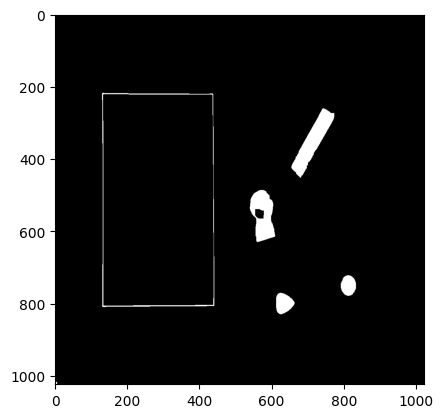

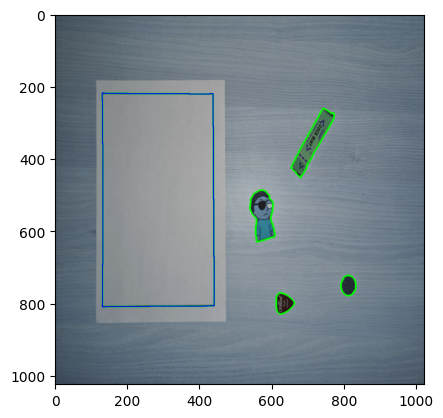

Current image: './tests/4_2.jpg'


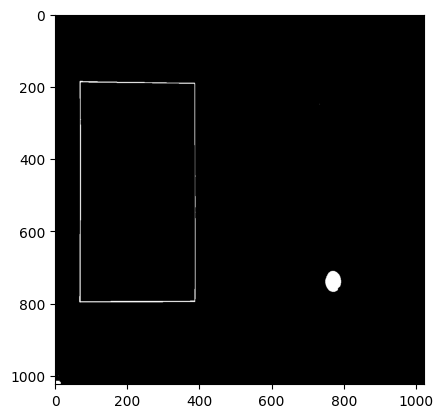

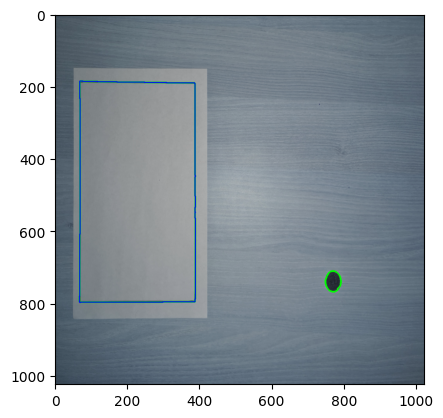

In [4]:
for path in TESTS_IMGS_PATHS:
    print("Current image: '{}'".format(path))
    img = placer.load_and_preproc_image(path)
    placer.detect_elements(img)

<h5>Этап 2. Выделение масок предметов.</h5>

Далее, для тестового изображения "./tests/4_0.jpg" представлен результат вычленения масок из изображения по имеющимся контурам. Данный тест выбран не случайно: на нем представлены все предметы.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


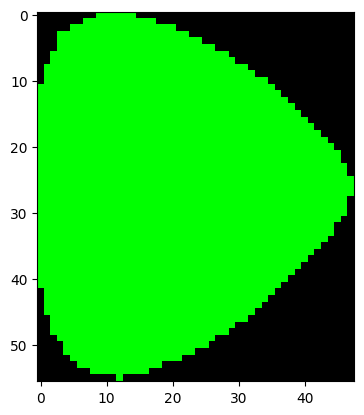

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


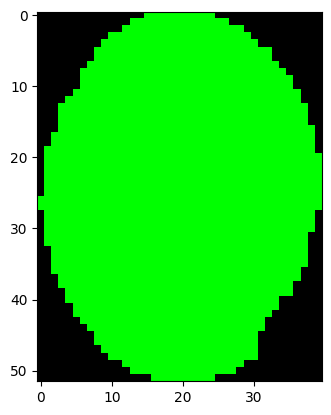

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


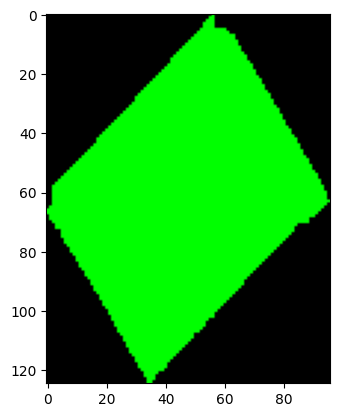

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


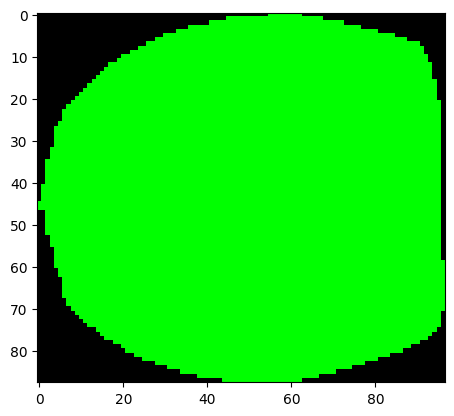

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


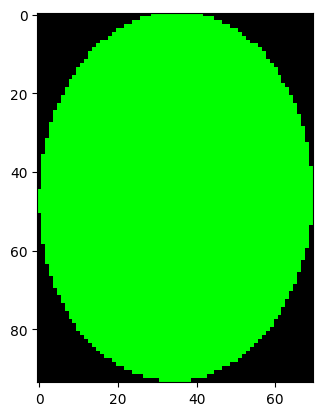

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


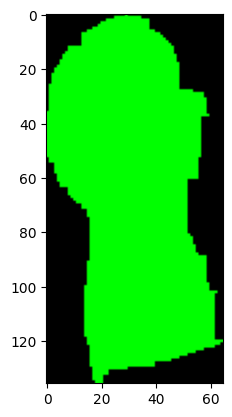

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


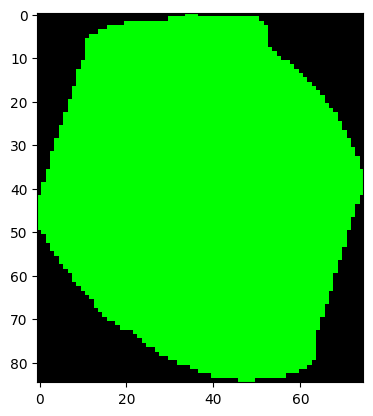

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


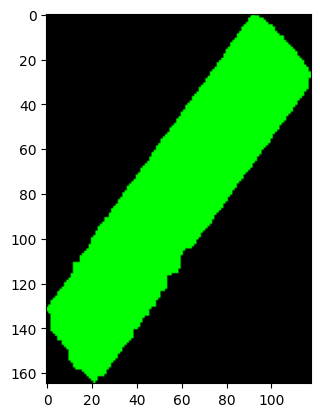

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


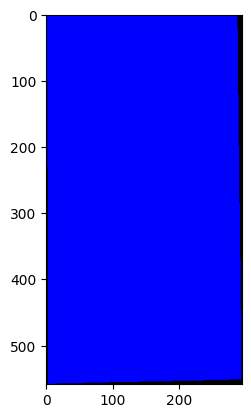

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


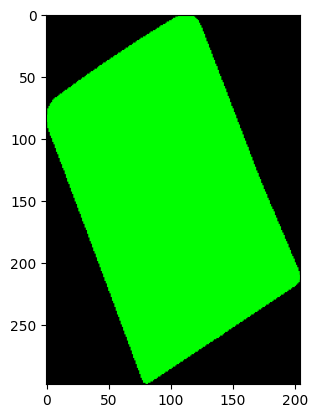

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


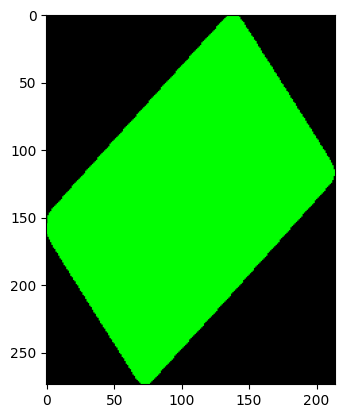

In [5]:
placer.IS_DEBUG_MODE = False
img = placer.load_and_preproc_image("./tests/4_0.jpg")
elements_contours, polygon_id = placer.detect_elements(img)

placer.IS_DEBUG_MODE = True
objects, polygon = placer.generate_masks(img, elements_contours, polygon_id)


<h5>Этап 3. Предварительное тестирование</h5>

Данный этап предназначен для прохождения предварительных тестов масок, по итогам которых можно без 4-ого этапа сразу сказать: поместятся ли предметы в многоугольник или нет.

На данный момент проходится один тест: тест на превышение площадей.

In [6]:
placer.IS_DEBUG_MODE = False
for path in TESTS_IMGS_PATHS:
    img = placer.load_and_preproc_image(path)
    elements_contours, polygon_id = placer.detect_elements(img)
    objects, polygon = placer.generate_masks(img, elements_contours, polygon_id)
    print("Current image: {}. Test results: {}".format(path, placer.preprocessing_tests(objects, polygon)))

Current image: ./tests/0_0.jpg. Test results: False
Current image: ./tests/0_1.jpg. Test results: False
Current image: ./tests/0_2.jpg. Test results: False
Current image: ./tests/0_3.jpg. Test results: False
Current image: ./tests/1_0.jpg. Test results: True
Current image: ./tests/1_1.jpg. Test results: True
Current image: ./tests/1_2.jpg. Test results: False
Current image: ./tests/1_3.jpg. Test results: False
Current image: ./tests/2_0.jpg. Test results: True
Current image: ./tests/2_1.jpg. Test results: True
Current image: ./tests/2_2.jpg. Test results: True
Current image: ./tests/2_3.jpg. Test results: False
Current image: ./tests/3_0.jpg. Test results: True
Current image: ./tests/3_1.jpg. Test results: False
Current image: ./tests/3_2.jpg. Test results: True
Current image: ./tests/3_3.jpg. Test results: True
Current image: ./tests/3_4.jpg. Test results: True
Current image: ./tests/4_0.jpg. Test results: True
Current image: ./tests/4_1.jpg. Test results: True
Current image: ./tests/

<h5>Этап 4. Основной цикл</h5>

To be continued...